# Breast Cancer Experiment


In [77]:
#import needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
df = pd.read_csv('breast-cancer.csv')
df
#Preview of the dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [79]:
df.isnull().sum()
#Look for holes in the data

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [80]:
df.pop('Unnamed: 32')
# Removes unused Data Unnamed 32

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
564   NaN
565   NaN
566   NaN
567   NaN
568   NaN
Name: Unnamed: 32, Length: 569, dtype: float64

In [81]:
df.isnull().sum()
#No more holes.

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [82]:
count = df.diagnosis.value_counts()
count
#Distribution of both the Malignant and Benign

B    357
M    212
Name: diagnosis, dtype: int64

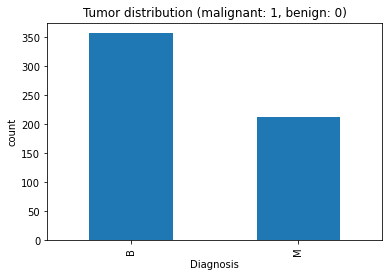

In [83]:
count.plot(kind = 'bar')
plt.title('Tumor distribution (malignant: 1, benign: 0)')
plt.xlabel('Diagnosis')
plt.ylabel('count')
plt.show()
#Graph of the Tumor Distribution


# Graph explanation above
### The graph above shows that the result were not evenly distributed.
### The graph shows the sample size for both results.

In [84]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

### Change Data to 1 and 0
#### Malignant = 1 and Benign = 0

In [85]:
df['numerical diagnosis'] = df['diagnosis']
#  M=1,B=0
df['numerical diagnosis'] = df['numerical diagnosis'].replace('M', 1)
#Replaces M into 1
df['numerical diagnosis'] = df['numerical diagnosis'].replace('B', 0)
#Replaces B into 0

### Split the Data frame to the columns that will be used
#### Numerical Diagnosis is the output
1. Radius Mean
2. Perimeter Mean
3. Texture Mean
4. Area Mean
5. Smoothness Mean
6. Compactness Mean
7. Concavity Mean
8. Concave Points Mean
9. Symmetry Mean
10. Fractal Dimension Mean
5. Numerical Diagnosis

In [91]:
new_df = pd.DataFrame()
new_df['radius_mean'] = df['radius_mean']
new_df['perimeter_mean'] = df['perimeter_mean']
new_df['texture_mean'] = df['texture_mean']
new_df['area_mean'] = df['area_mean']
new_df['smoothness_mean'] = df['smoothness_mean']
new_df['compactness_mean'] = df['compactness_mean']
new_df['concavity_mean'] = df['concavity_mean']
new_df['concave points_mean'] = df['concave points_mean']
new_df['symmetry_mean'] = df['symmetry_mean']
new_df['fractal_dimension_mean'] = df['fractal_dimension_mean']


new_df['numerical diagnosis'] = df['numerical diagnosis']
# Transfer everything needed to a new 
new_df

,radius_mean,perimeter_mean,texture_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,numerical diagnosis
0,17.99,122.80,10.38,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1
1,20.57,132.90,17.77,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,1
2,19.69,130.00,21.25,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,1
3,11.42,77.58,20.38,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,1
4,20.29,135.10,14.34,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,1
...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,142.00,22.39,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1
565,20.13,131.20,28.25,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,1
566,16.60,108.30,28.08,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,1
567,20.60,140.10,29.33,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,1


In [92]:
print(new_df.corr()['numerical diagnosis'].sort_values()) 
# Correlation to numerical Diagnosis

fractal_dimension_mean   -0.012838
symmetry_mean             0.330499
smoothness_mean           0.358560
texture_mean              0.415185
compactness_mean          0.596534
concavity_mean            0.696360
area_mean                 0.708984
radius_mean               0.730029
perimeter_mean            0.742636
concave points_mean       0.776614
numerical diagnosis       1.000000
Name: numerical diagnosis, dtype: float64


<AxesSubplot:>

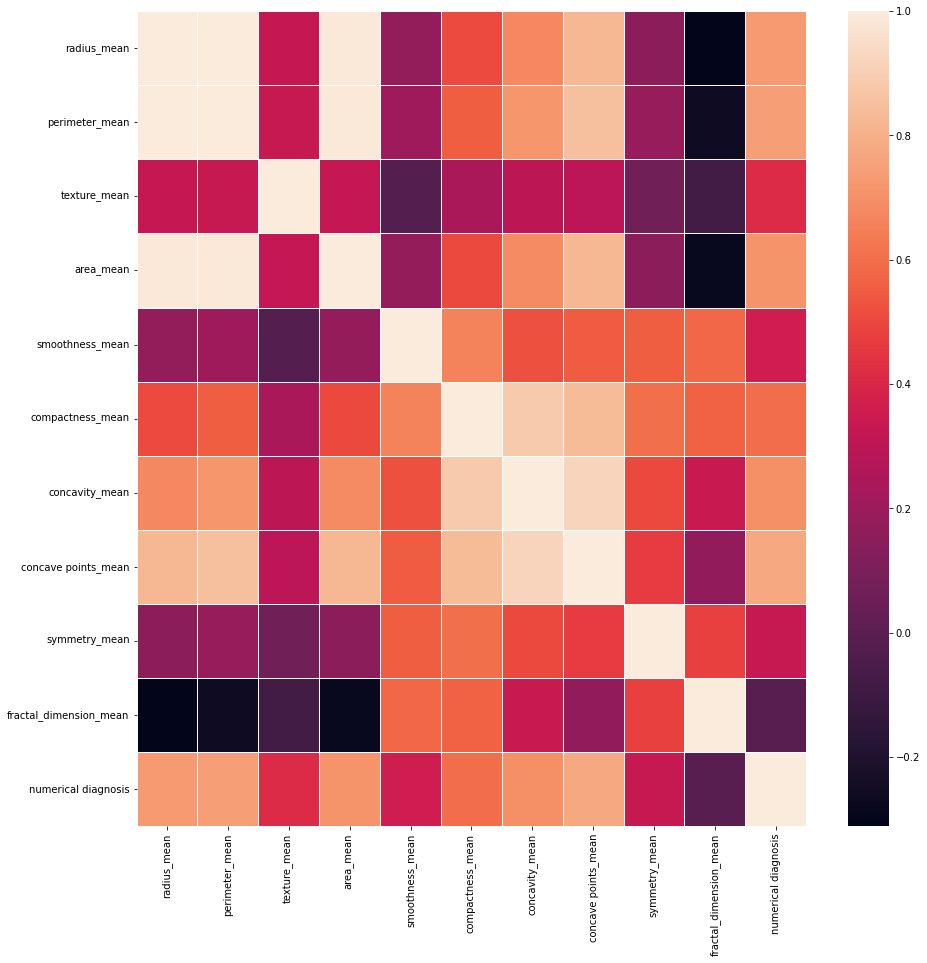

In [93]:
plt.figure(figsize=(15, 15))
sns.heatmap(new_df.corr(), linewidths=.5)
# Visualization of the correlation

In [94]:
from sklearn.model_selection import train_test_split,cross_val_score

X= new_df.drop(columns='numerical diagnosis')
Y=new_df['numerical diagnosis']

train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.2,random_state=10)
# Split of the data to training and testing

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
forest_clf = RandomForestClassifier(max_depth=10, random_state=0)
# Random Forest Classifier since its a classification problem
forest_clf.fit(train_X,train_Y)
ran_pred=forest_clf.predict(test_X)
# Training of the Model (above code)
# Testing of the accuracy (below)
forest_accuracy = accuracy_score(ran_pred,test_Y)
forest_accuracy = forest_accuracy * 100
print("Random forest classifier model accuracy = "+str(round(forest_accuracy,2))+"%")
#Rounds off the accuracy to 2 decimal places

Random forest classifier model accuracy = 95.61%


In [104]:
radius = input("Input Radius Mean:")
perimeter = input("Input Perimeter Mean:")
texture = input("Input Texture Mean:")
area = input("Input Area Mean:")
smoothness = input("Input Smoothness Mean:")
compactness = input("Input Compactness Mean:")
concavity = input("Input Concavity Mean:")
concavepoints = input("Input Concave Mean:")
symmetry = input("Input Symmetry Mean:")
fractal_dimension = input("Fractal Dimension Mean:")



Input Radius Mean:15
Input Perimeter Mean:97.45
Input Texture Mean:15.51
Input Area Mean:684.5
Input Smoothness Mean:0.08371
Input Compactness Mean:0.1096
Input Concavity Mean:0.06505
Input Concave Mean:0.0378
Input Symmetry Mean:0.1881
Fractal Dimension Mean:0.05907


In [105]:
prediction = forest_clf.predict([[ radius, perimeter, texture, area, smoothness, compactness, concavity, concavepoints, symmetry, fractal_dimension]])
if prediction[0] == 0:
    print("The patient has a benign tumor. B")
elif prediction[0] == 1:
    print("The patient has a malignant tumor. M")

The patient has a benign tumor. B


C:\Users\kylle\miniconda3\envs\myenv2\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
